# Исследование

In [164]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [165]:
data = pd.read_csv('./train.csv')

Посмотрим на данные

In [166]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [193]:
data.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2833,72,20.30,1401.15,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1900,9,24.95,190.25,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2444,21,60.05,1236.15,Male,1,No,No,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
3099,72,100.55,7325.10,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic)
1030,55,85.45,4874.70,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check


По количеству уникальных значений можно сделать вывод о кодировании категориальных данных, например, если кол-во = 2, то можно заменить значения на 0 и 1, а для остальных использовать one-hot-encoding

In [167]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

Хотим посмотреть на количество пропусков и типы данных признаков

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Признак `TotalSpent` имеет тип данных `object`, но хранит значения типа `float64`. Хочется привести этот признак к числовому формату.

In [169]:
print(data.TotalSpent[data.TotalSpent == ' '].count()) # 9

data.TotalSpent = data.TotalSpent.str.replace(' ', '')

print(data.TotalSpent[data.TotalSpent == ' '].count()) # 0
print(data.TotalSpent[data.TotalSpent == ''].count()) # 9

# Заменим на '0.0', чтобы получилось привести столбец в `float64`
data.TotalSpent[data.TotalSpent == ''] = '0.0'
data.TotalSpent = data.TotalSpent.astype(np.float64, copy=False)

# Девять нулевых элементов, а это значит, что,
# если мы заменим на среднее значение,
# то не сильно попортим исходные данные
print(data.TotalSpent[data.TotalSpent == 0].count()) # 9
data.TotalSpent[data.TotalSpent == 0] = data.TotalSpent.mean()

data.info()

9
0
9
9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  

<ipython-input-169-401a3cf6d57d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalSpent[data.TotalSpent == ''] = '0.0'
<ipython-input-169-401a3cf6d57d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalSpent[data.TotalSpent == 0] = data.TotalSpent.mean()


In [170]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'IsSeniorCitizen'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Находим и удаляем дубликаты в датасете

In [171]:
print(data.duplicated().sum()) # 14
data.drop_duplicates(inplace=True)

14


Выделение целевого признака, а также удаление его из тренеровочного датасета

In [172]:
y_train = data.Churn
data = data.drop(columns=['Churn'])

Построение тепловой карты с пропусками (NaN)

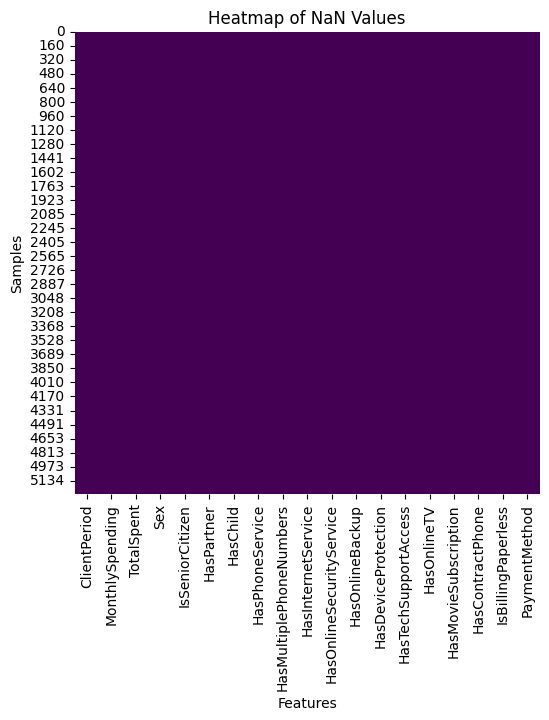

In [173]:
import seaborn as sns

nan_mask = data.isna()

plt.figure(figsize=(6, 6))

sns.heatmap(nan_mask, cmap='viridis', cbar=False)

plt.title('Heatmap of NaN Values')
plt.xlabel('Features')
plt.ylabel('Samples')

plt.show()

## Анализ данных

In [174]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
count,5268.000000,5268.000000,5268.000000,5268.000000
mean,32.480448,64.977563,2297.353555,0.159643
std,24.529439,30.176025,2267.126694,0.366310
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.537500,405.362500,0.000000
50%,29.000000,70.450000,1418.650000,0.000000
75%,55.000000,90.050000,3808.637500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


Построение гистограмм для числовых признаков

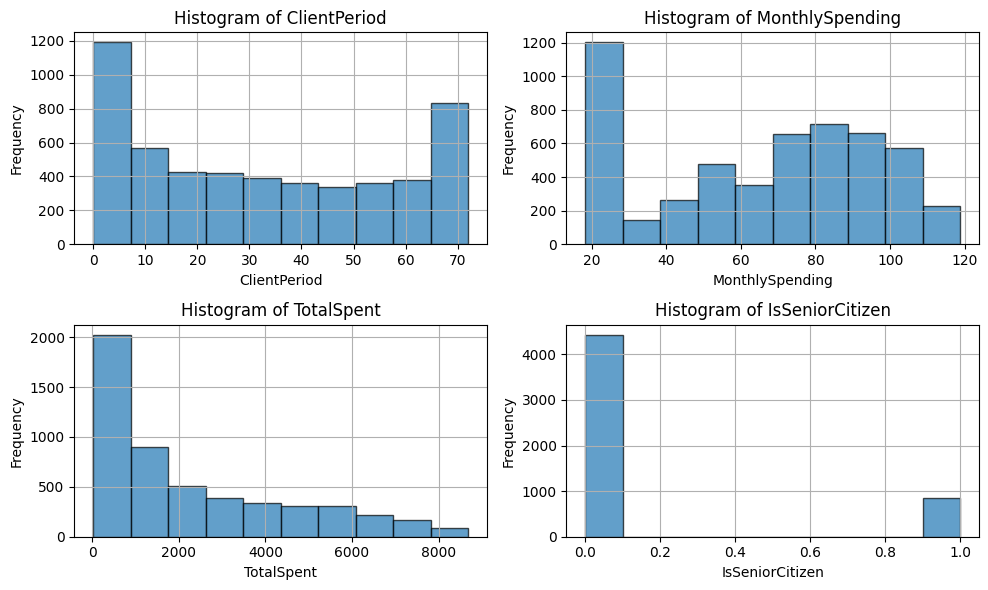

In [175]:
df = pd.DataFrame(data[num_cols])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for ax, col in zip(axes.flatten(), num_cols):
    ax.hist(df[col], bins=10, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

plt.tight_layout()
plt.show()

Построение bar диаграмм для категориальных признаков

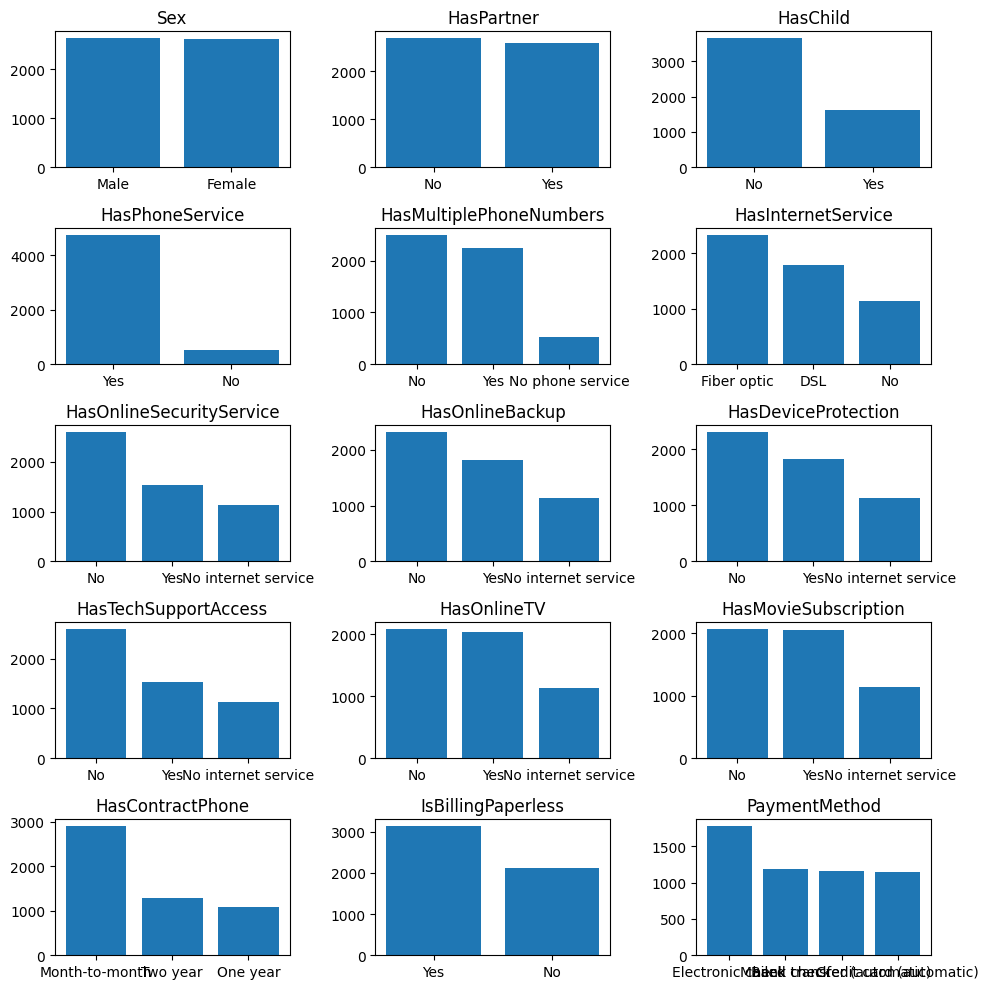

In [176]:
df = pd.DataFrame(data[cat_cols])

cnt_cur = 5

num_features = len(df.columns)
fig, axes = plt.subplots(nrows=cnt_cur, ncols=num_features // cnt_cur + num_features % cnt_cur, figsize=(10, 10))

for i, column in enumerate(df.columns):
    row = i // (num_features // cnt_cur + num_features % cnt_cur)
    col = i % (num_features // cnt_cur + num_features % cnt_cur)
    value_counts = df[column].value_counts()
    ax = axes[row, col] if num_features > 1 else axes
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)

plt.tight_layout()
plt.show()

Посмотрем на распределенеи целевой переменной

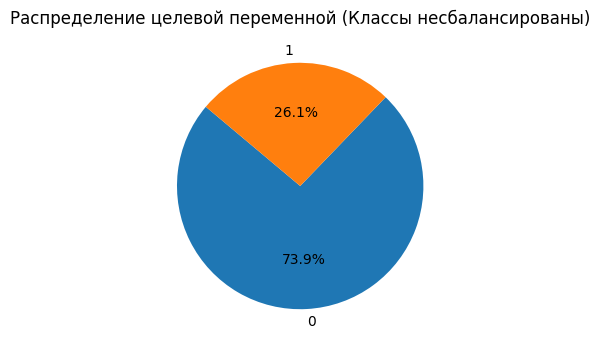

In [177]:
target_counts = y_train.value_counts()

plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение целевой переменной (Классы несбалансированы)')
plt.show()

Создадим копию данных, в которой заменим для "бинарных" категориальных данных значения на 0 и 1. Такой набор данных после one-hot-encoding'а создаст меньше признаков, а значит меньше нагрузит модель.

Для этого лучше всего подойдут конвееры, создадим три конвеера, для трех типов признаков.

In [178]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


data2 = data.copy()

numeric_features = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'IsSeniorCitizen',
]

categorical_features_ordinal = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

categorical_features_onehot = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, categorical_features_ordinal),
        ('ohe', onehot_transformer, categorical_features_onehot)
    ]
)

processed_data2 = preprocessor2.fit_transform(data2)

data2 = pd.DataFrame(processed_data2)
data2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.763889,0.012438,0.116265,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.075622,0.213870,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.013889,0.573632,0.006589,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.444444,0.607463,0.294392,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.833333,0.965174,0.777712,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.041667,0.120896,0.007310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5264,0.694444,0.260697,0.250363,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5265,0.013889,0.366169,0.004183,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5266,0.402778,0.574627,0.253456,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Применение линейных моделей

In [179]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
num_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)
])

alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', LogisticRegressionCV())
])

alg.fit(data, y_train)

In [ ]:
alg2 = Pipeline(steps=[
    ('alg', LogisticRegressionCV())
])

alg2.fit(data2, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alg__Cs': [[10000], [1000], [100], [10], [1], [0.1], [0.01], [0.001]],
    'alg__max_iter': [100, 500, 1000, 2000, 5000]
}

gs = GridSearchCV(alg,
                  parameters,
                  cv=5,
                  verbose=2,
                  scoring='roc_auc',
                  n_jobs=-1)

gs.fit(data, y_train)
gs.best_params_

In [ ]:
gs2 = GridSearchCV(alg2,
                  parameters,
                  cv=5,
                  verbose=2,
                  scoring='roc_auc',
                  n_jobs=-1)

gs2.fit(data2, y_train)
gs2.best_params_

In [184]:
from sklearn.metrics import roc_auc_score

y_pred_proba = gs.predict_proba(data)[:, 1]
y_pred_proba2 = gs2.predict_proba(data2)[:, 1]

score = roc_auc_score(y_train, y_pred_proba)
score2 = roc_auc_score(y_train, y_pred_proba2)

print(f"ROC-AUC: {score}, {gs.best_params_}")
print(f"ROC-AUC-2: {score2}, {gs2.best_params_}")

ROC-AUC: 0.8484612986500337, {'alg__Cs': [100], 'alg__max_iter': 100}
ROC-AUC-2: 0.8484704569191284, {'alg__Cs': [1000], 'alg__max_iter': 100}


## Применение градиентного бустинга

In [ ]:
!pip install catboost

In [189]:
from catboost import CatBoostClassifier, cv, Pool


X_train_boost, X_valid_boost, y_train_boost, y_valid_boost = train_test_split(data, y_train, test_size=0.33, random_state=42)

model = CatBoostClassifier(
    cat_features=[X_train_boost.columns.get_loc(col) for col in cat_cols],
    # random_seed=42,
    logging_level='Silent'
)

model.fit(X_train_boost, y_train_boost)
y_pred_boost = model.predict_proba(X_valid_boost)[:, 1]
roc_auc_score(y_valid_boost, y_pred_boost)

0.835996713566807

In [190]:
model2 = CatBoostClassifier(cat_features=cat_cols,learning_rate=0.1, max_depth=4, n_estimators=100, logging_level='Silent')

model2.fit(X_train_boost, y_train_boost)
y_pred_boost = model2.predict_proba(X_valid_boost)[:, 1]
roc_auc_score(y_valid_boost, y_pred_boost)

0.8398094895758448

In [148]:
param_grid = {
    'depth': [3],
    'learning_rate': [0.3],
    'iterations': [100],
    'l2_leaf_reg': [100],
}

# param_grid = {
#     'iterations': [1000],
#     'learning_rate': [0.03, 0.3],
#     'depth': [3, 6],
#     'l2_leaf_reg': [1, 100],
#     'bagging_temperature': [0.5, 1, 2],
#     'random_strength': [0.5, 1, 2]
# }


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_train_boost, y_train_boost)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший результат ROC AUC: ", grid_search.best_score_)

Лучшие параметры:  {'depth': 3, 'iterations': 100, 'l2_leaf_reg': 100, 'learning_rate': 0.3}
Лучший результат ROC AUC:  0.8476111724271501


Результат: самый лучшей показатель выдала модель CatBoostClassifier() с дефолтными настройками. Пытался подобрать через GridSearch, но лучшего подбора параметров у меня не получилось, на это ушло очень много времени :(

Думаю продолжу это занятие когда еще больше присиполнюсь в мл :)

А пока я еще не придумал как сильнее улучшить метрику :|

# Предсказания

In [191]:
best_model = model

In [192]:
X_test = pd.read_csv('./test.csv')

# --------------------------------------------------------------------
X_test.TotalSpent = X_test.TotalSpent.str.replace(' ', '')
X_test.TotalSpent[X_test.TotalSpent == ''] = '0.0'
X_test.TotalSpent = X_test.TotalSpent.astype(np.float64, copy=False)
X_test.TotalSpent[X_test.TotalSpent == 0] = X_test.TotalSpent.mean()
# processed_X_test = preprocessor2.fit_transform(X_test) # preprocessor
# X_test = pd.DataFrame(processed_X_test)
# --------------------------------------------------------------------

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission

<ipython-input-192-40c4812a92e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.TotalSpent[X_test.TotalSpent == ''] = '0.0'
<ipython-input-192-40c4812a92e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.TotalSpent[X_test.TotalSpent == 0] = X_test.TotalSpent.mean()


,Id,Churn
0,0,0.039223
1,1,0.721836
2,2,0.647428
3,3,0.016877
4,4,0.003601
...,...,...
1756,1756,0.100548
1757,1757,0.016654
1758,1758,0.846000
1759,1759,0.617815
